In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/yjzhu/SOLAR/MyPy")
import juanfittest
import importlib
importlib.reload(juanfittest)
from juanfittest import SpectrumFit2D
from juanfittest import gaussian


In [34]:
wvl = np.linspace(194.5,195.5,101)

npix_slit = 100
npix_raster = 30
intensity_data = np.zeros((npix_slit,npix_raster,101))
line_wvl = np.zeros((npix_slit,npix_raster,2))
line_wvl[:,:,0] = 194.8 + np.random.randn(npix_slit,npix_raster)*0.02
line_wvl[:,:,1] = 195.1 + np.random.randn(npix_slit,npix_raster)*0.02

line_int = np.zeros((npix_slit,npix_raster,2))
line_int[:,:,0] = 2*(np.random.randn(npix_slit,npix_raster)*0.1+1)
line_int[:,:,1] = 5*(np.random.randn(npix_slit,npix_raster)*0.1+1)

line_fwhm = np.zeros((npix_slit,npix_raster,2))
line_fwhm[:,:,0] = 0.07 + np.random.randn(npix_slit,npix_raster)*0.006
line_fwhm[:,:,1] = 0.08 + np.random.randn(npix_slit,npix_raster)*0.006

line_cont = np.zeros((npix_slit,npix_raster))
line_cont[:,:] = 0.1 + np.random.randn(npix_slit,npix_raster)*0.02

for ii in range(npix_slit):
    for jj in range(npix_raster):
        intensity_data[ii,jj,:] = gaussian(wvl,line_wvl[ii,jj,0],line_int[ii,jj,0],line_fwhm[ii,jj,0]) + \
                                    gaussian(wvl,line_wvl[ii,jj,1],line_int[ii,jj,1],line_fwhm[ii,jj,1]) + \
                                    line_cont[ii,jj]

error_lvl = np.sqrt(intensity_data + 0.01)*0.1
intensity_data += np.random.normal(loc=0,scale=error_lvl)

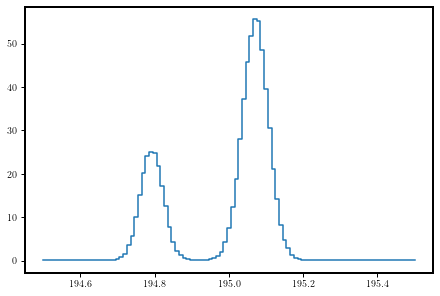

In [35]:
fig, ax = plt.subplots(figsize=(6,4),constrained_layout=True)
ax.step(wvl,intensity_data[0,0],where="mid")

In [36]:
fit_model = SpectrumFit2D(intensity_data,wvl,line_number=2,line_wvl_init=[194.8,195.1],
                        int_max_init=[20,50],fwhm_init=[0.06,0.07],same_width=False)
fit_model.run_lse_mp(ncpu=1)

/Users/yjzhu/Desktop/Solar/MyPy/juanfittest.py:214: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


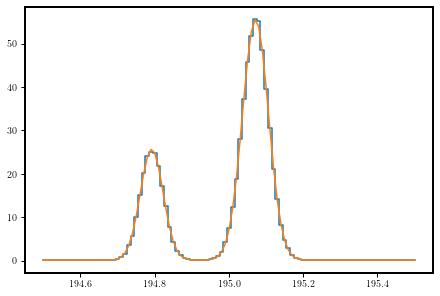

In [37]:
fig, ax = plt.subplots(figsize=(6,4),constrained_layout=True)
ax.step(wvl,intensity_data[0,0],where="mid")
fit_curve = gaussian(wvl,fit_model.line_wvl_fit[0,0,0],fit_model.int_total_fit[0,0,0],fit_model.fwhm_fit[0,0,0]) + \
            gaussian(wvl,fit_model.line_wvl_fit[0,0,1],fit_model.int_total_fit[0,0,1],fit_model.fwhm_fit[0,0,1]) + \
                                    line_cont[0,0]

ax.plot(wvl,fit_curve)

In [43]:
fit_model_mp = SpectrumFit2D(intensity_data,wvl,line_number=2,line_wvl_init=[194.8,195.1],
                        int_max_init=[20,50],fwhm_init=[0.06,0.07],same_width=False)
fit_model_mp.run_lse_mp(ncpu=4,prev_init=False)

/Users/yjzhu/Desktop/Solar/MyPy/juanfittest.py:214: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfittest.py:214: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfittest.py:214: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/Users/yjzhu/Desktop/Solar/MyPy/juanfittest.py:214: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


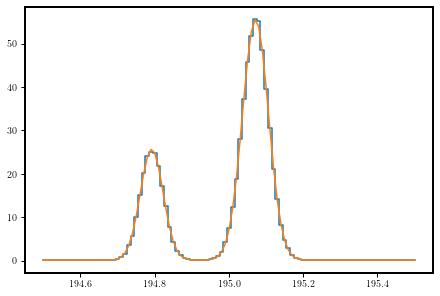

In [44]:
fig, ax = plt.subplots(figsize=(6,4),constrained_layout=True)
ax.step(wvl,intensity_data[0,0],where="mid")
fit_curve = gaussian(wvl,fit_model_mp.line_wvl_fit[0,0,0],fit_model_mp.int_total_fit[0,0,0],fit_model_mp.fwhm_fit[0,0,0]) + \
            gaussian(wvl,fit_model_mp.line_wvl_fit[0,0,1],fit_model_mp.int_total_fit[0,0,1],fit_model_mp.fwhm_fit[0,0,1]) + \
                                    line_cont[0,0]

ax.plot(wvl,fit_curve)

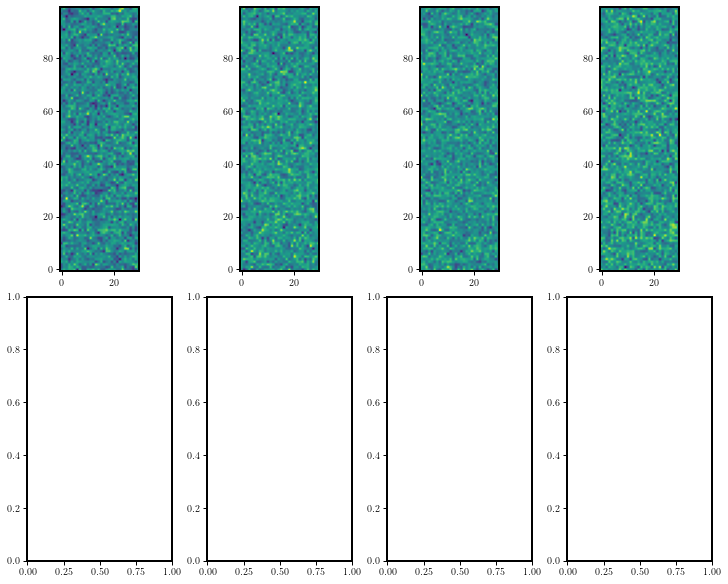

In [42]:
fig, axes = plt.subplots(2,4,figsize=(10,8),constrained_layout=True)

axes[0,0].imshow(fit_model.line_wvl_fit[:,:,0],origin="lower")
axes[0,1].imshow(fit_model.int_total_fit[:,:,0],origin="lower")
axes[0,2].imshow(fit_model.fwhm_fit[:,:,0],origin="lower")
axes[0,3].imshow(fit_model.int_cont_fit[:,:],origin="lower")

axes[0,0].imshow(fit_model.line_wvl_fit[:,:,0],origin="lower")
axes[0,1].imshow(fit_model.int_total_fit[:,:,0],origin="lower")
axes[0,2].imshow(fit_model.fwhm_fit[:,:,0],origin="lower")
axes[0,3].imshow(fit_model.int_cont_fit[:,:],origin="lower")